# ASSIGNMENT 2

## Problem 2. Inferential statistics

Importing necessary libraries:

In [372]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
import statsmodels.api as sm

### (1)

#### (a) Simulate samples of size n = 100, . . . , 100000 (with step say 1000) from a normal distribution with mean 1 and variance 1, i.e. $N (1, 1)$. For each sample estimate the mean, the variance. Plot the path of sample means as function of n. What conclusion can we draw from the figure if we keep in mind the law of large numbers?

In [373]:
#defining mean and standard deviation (it also equals 1, as square root of 1 is 1)
mean = 1
var = 1
#genereting sample sizes from n=100 to n=100000 with step 1000
sample_sizes = np.linspace(100, 100000, 1000, dtype=np.int32)

In [374]:
sample_means=[]
sample_vars=[]
np.random.seed(123)
#defining r.v. object for N(1,1)
X = stats.norm(mean,var)
#generating sample in loop for each size with step 1000 and finding sample's mean and variance, 
#given that we have n-1 degrees of freedom for sample
for size in sample_sizes:
    sample = X.rvs(size)
    sample_means.append(sample.mean())
    sample_vars.append(sample.var(ddof=1))

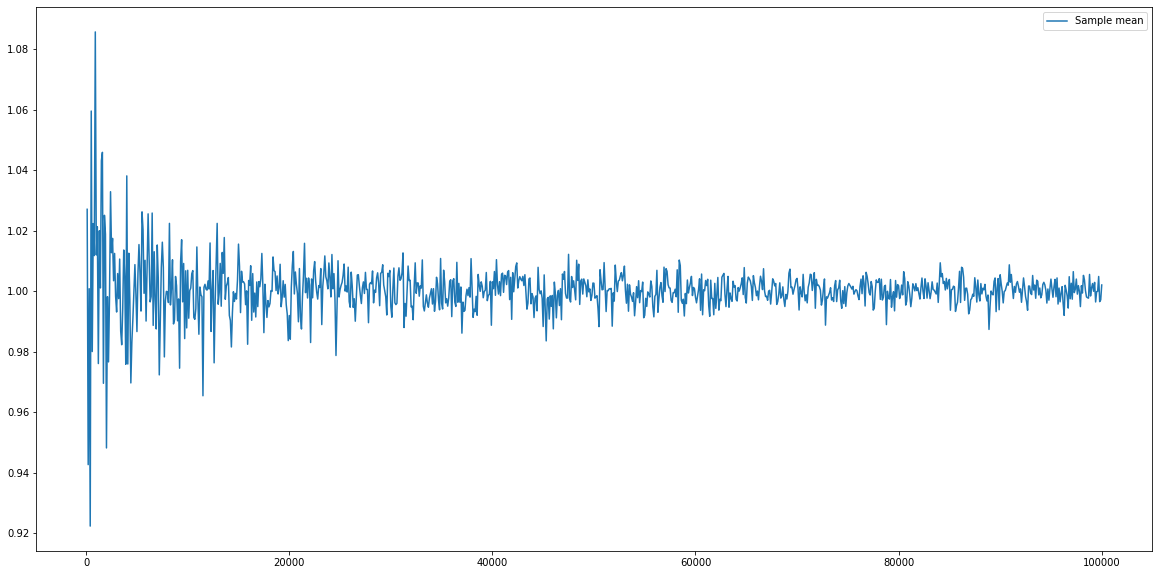

In [375]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.lineplot(sample_sizes, sample_means, label='Sample mean')
plt.show()

Let's recall law of large numbers (LLN):

$
\lim_{n \to \infty} P(|\bar{X}-\mu| \geq c) = 0
$

We can conclude from the figure that the bigger $n$ (size of sample) becomes, the closer mean of $\bar{X}$ approaches true mean $\mu$, exactly as stated in LLN above.

#### (b) Frequently if is difficult to obtain more data. How many observations do we need in order to obtain an estimator which is close enough $(±0.01)$ to the true value?

We will approach this problem empirically, as we pretend to not be aware of confidence intervals existence (as it follows from the Slack discussion on the question).

We will write a function to find such minimum sample size interatively and then use it for sample mean and sample variance. 

In [376]:
#defining allowed error
error = 0.01

In [377]:
def min_sample_size(true_val, error, sample_sizes, sample_statistics):
    #wrapping statistics into numpy array
    vals = np.array(sample_statistics)
    #check from both sides of each statistics whether its eough close o the true value
    first_idx = [(vals[i:] > (1-error)*true_val).all() & (vals[i:] < (1+error)*true_val).all() for i in range(len(sample_sizes))].index(True)
    return sample_sizes[first_idx]

In [378]:
sample_size_mean = min_sample_size(mean, error,sample_sizes, sample_means)
sample_size_var = min_sample_size(var, error, sample_sizes, sample_vars)

In [379]:
print("Minimum number of observations for sample mean to be ±1% from the true mean is:", sample_size_mean)
print('')
print("Minimum number of observations for sample variance to be ±1% from the true variance is:", sample_size_var)

Minimum number of observations for sample mean to be ±1% from the true mean is: 89000

Minimum number of observations for sample variance to be ±1% from the true variance is: 96700


#### (c) Add to the plot the 95% confidence intervals. Do it ones with known $σ$ and ones with an estimated. The confidence intervals have to be constructed manually. Provide their interpretation.

Let's recall how to define confidence interval for $\mu$ when $\sigma$ is known:

$
\bar{X} ± z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}
$

When $\sigma$ is not known:

$
\bar{X} ± t_{n-1;1-\frac{\alpha}{2}} \frac{\Sigma}{\sqrt{n}}
$

Thus, let's find confid.intervals if $\sigma$ is known with formula $
\bar{X} ± z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}
$:

In [380]:
#mapping each sample size and mean together to use them together in future loop
size_mean_dict={}
for size,mean in zip(sample_sizes,sample_means):
    size_mean_dict[size] = mean

#finding alpha for conf.interval 95 %
alpha=1-0.95
#finding z-value, we could also do it from z-table
z_value = stats.norm.ppf(1 - alpha/2)
#creating separate lists for conf points above and below each sample mean
z_conf_interval_points_above=[]
z_conf_interval_points_below=[]
#defining additionally std.deviation, however it's known to be one.
std = np.sqrt(var)

#looping through mapped list and applying formula to each sample mean:
for size,mean in size_mean_dict.items():
    z_conf_interval_points_above.append(mean+(z_value*(std/(np.sqrt(n)))))
    z_conf_interval_points_below.append(mean-(z_value*(std/(np.sqrt(n)))))


Also let's find confid.intervals if $\sigma$ is unknown with formula
$
\bar{X} ± t_{n-1;1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}
$

In [381]:
#mapping each sample size,mean and var together to use them together in future loop
size_mean_var_dict={}
for size,mean,var in zip(sample_sizes,sample_means,sample_vars):
    size_mean_var_dict[size] = [mean,var]

#finding alpha
alpha=1-0.95
#creating separate lists for conf points above and below each sample mean
t_conf_interval_points_above=[]
t_conf_interval_points_below=[]

#looping through mapped list and applying formula to each sample mean:
for size,values in size_mean_var_dict.items(): 
    #finding t-value for each sample, we could also do it from t-table
    t_value = stats.t.ppf(df=size-1, q=1-alpha/2)
    #looping through mapped list and applying formula to each sample mean and var:
    t_conf_interval_points_above.append(values[0]+(t_value*(values[1]/(np.sqrt(n)))))
    t_conf_interval_points_below.append(values[0]-(t_value*(values[1]/(np.sqrt(n)))))


Let's plot our sample means figure with adding both conf.intervals for known and unknown $\sigma$:

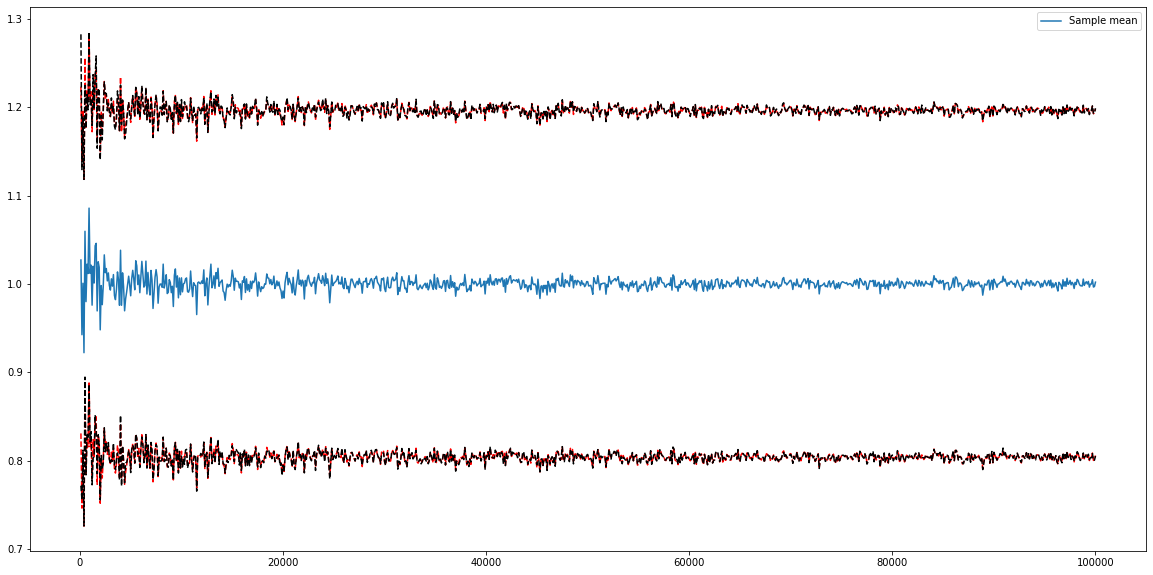

In [382]:
fig, axes = plt.subplots(figsize=(20,10))
sns.lineplot(sample_sizes, sample_means, label='Sample mean')
#plot confidence intervals separately from z-score
plt.plot(sample_sizes, z_conf_interval_points_above, '--', color='red')
plt.plot(sample_sizes, z_conf_interval_points_below, '--', color='red')
#plot confidence intervals separately from t-score
plt.plot(sample_sizes, t_conf_interval_points_above, '--', color='black')
plt.plot(sample_sizes, t_conf_interval_points_below, '--', color='black')
plt.show()

95%-confidence intervals define some interval around given sample statistic, where true value of parameter lies with probability of 0.95.

Figure above absolutely follows the rule that the larger the sample size (n), the closer the conf. intervals from t-distribution mimics conf.intervals of z-distribution. In real life we seldomly know real standard deviation and for large samples, as we see from the figure above, we actually don't need, as we can use t-score. Also t-distribution is more appropriate for n<30.

#### (d) Next plot the sample variance as a function of n. If we think about the consistency of the sample variance as an estimator for $σ^2$ , does the figure support this property? Give the interpretation of consistency in your own words.

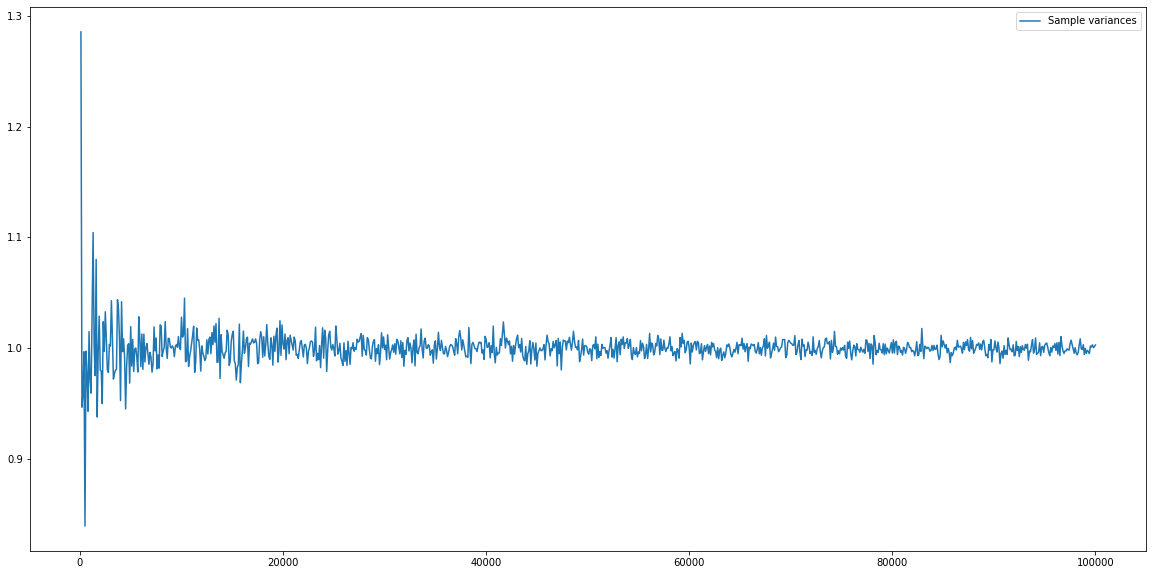

In [383]:
#plotting sample variances as function of sample sizes
fig, axes = plt.subplots(figsize=(20, 10))
sns.lineplot(sample_sizes, sample_vars, label='Sample variances')
plt.show()

Formally, sequence of estimators $\hat{\vartheta_n}$ is consistent if for all $c>0$ holds:

$
P(|\hat{\Theta_n}-\theta| \geq c) = 0
$
for 
$n \to \infty$

It is known, that sample variance is consistent estimator for true $\sigma$. We clearly see from the figure that as n becomes larger, difference between sample variance and true variance becomes smaller.

In simple words, consistency means that with bigger sample size sequence of sample statistics become placed more around true value of the parameter. 

### (2)

#### (a) Let $x_1, ..., x_n$ be a given sample. We assume that it stems from a t-distribution with an unknown number of degrees of freedom. Write down the corresponding log-likelihood function. The density function of the $t_{df}$-distribution is given by $f(x) = \frac{(1 + \frac{x^2}{df})^{-\frac{df+1}2}}{B(df/2, 1/2) \sqrt df}$.

Likelihood function is function of the form ${L(x_1, ..., x_n; \theta) = \prod f(x_i)}$, where ${f}$ - density function.

$
L_d(x_1, \dots, x_n)
=
\prod_{i=1}^n \frac{(1 + \frac{x_i^2}{df})^{-\frac{df+1}2}}{B(df/2, 1/2) \sqrt df}
=
\frac{\prod_{i=1}^n (1 + \frac{x_i^2}{df})^{-\frac{df+1}2}}{(B(df/2, 1/2) \sqrt df)^n}
=
\frac{\prod_{i=1}^n (1 + \frac{x_i^2}{df})^{-\frac{df+1}2}}{B^n(df/2, 1/2) \cdot df^{n/2}}
\rightarrow
\\
\rightarrow
\ln{L_d(x_1, \dots, x_n)}
=
\ln{\frac{\prod_{i=1}^n (1 + \frac{x_i^2}{df})^{-\frac{df+1}2}}{B^n(df/2, 1/2) \cdot df^{n/2}}}
=
\frac{-\frac{df+1}2 \sum_{i=1}^n \ln(1 + \frac{x_i^2}{df})}{n \ln(B(df/2, 1/2) \cdot \sqrt df)}
$

#### (b) Simulate a sample of size $n = 100$ from $t_5$ . Maximize the log-likelihood function (numerically) for the given sample and obtain the ML estimator of the number of degrees of freedom. Compare the estimator with the true value.

In [384]:
n=100

In [385]:
# defining likelihood function
def log_likelihood(arr_pdf):
    return np.sum(np.log(arr_pdf))

# defining optimization function
def max_log_likelihood(n,step):
    np.random.seed(987)
    X = stats.t(df=5)
    sample = X.rvs(n)
    potential_df = np.linspace(1,200,step)
    candidate=[]
    for df in potential_df:
        arr_pdf = stats.t(df=df).pdf(sample)
        candidate.append(log_likelihood(arr_pdf))
    optimized_df = potential_df[np.argmax(candidate)]
    return optimized_df

In [386]:
print("For sample size",n,"we estimated optimal df*",max_log_likelihood(n,1000),"degrees of freedom.")

For sample size 100 we estimated optimal df* 6.9759759759759765 degrees of freedom.


Our estimate df* is different from the true value by around 1.97.

#### (c) Increase the sample to $n = 5000$ and compare the new estimator with the true value. Which property of the estimator we expect to observe?

In [387]:
print("For sample size",5000,"we estimated optimal df*",max_log_likelihood(5000,1000),"degrees of freedom.")

For sample size 5000 we estimated optimal df* 4.983983983983984 degrees of freedom.


Now we see that our new maximazed likelihood degree of freedom is only slightly different from the true value of 5.

We expect to observe consistensy, so that the sequence of MLEs converges in probability to the value being estimated, so that with bigger sample size we get more to true value of the parameter.

In [388]:
mle_vals=[]
#sizes=np.linspace(1000,10000,1000,dtype=np.int32)
for size in [1000,2000,3000,4000,5000,6000,7000,10000]:
    mle_vals.append(max_log_likelihood(size,1000))

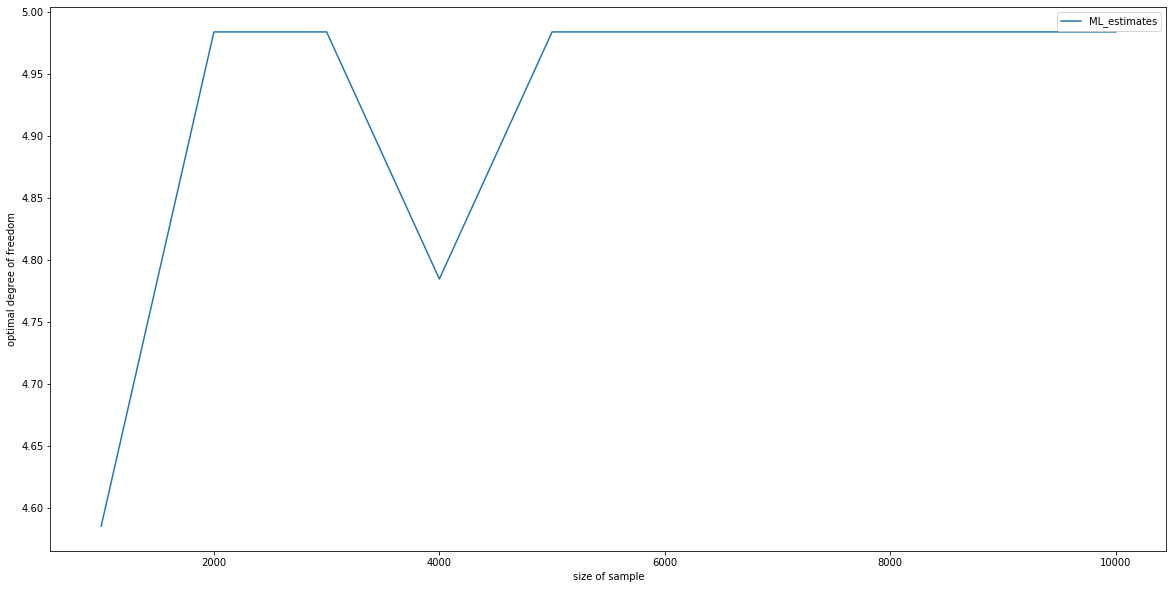

In [389]:
fig, axes = plt.subplots(figsize=(20, 10))

sns.lineplot(np.array([1000,2000,3000,4000,5000,6000,7000,10000]),np.array(mle_vals),label="ML_estimates")
plt.ylabel("optimal degree of freedom")
plt.xlabel("size of sample")
plt.show()

We see that the bigger the sample, the closer ML estimates are to true value of degrees of freedom.

### (3)

#### (a) Simulate b = 1000 samples of size n = 100 from a $\chi^2_{2}$ distribution with mean 1 and variance 1. For each sample estimate the mean, the variance and keep them. Plot the histogram for one of the sample, so that you get a better feeling how the original distribution looks like.

In [390]:
#amount of samples
b = 1000
#size of sample
n = 100
#number of degrees of freedom
df = 2

For $\chi^2$ distribution with k degrees of freedom $\mu=k$ and $\sigma^{2}=2k$. Thus, in our case for $k=2$ we have $\mu_{X}=2$ and $\sigma^{2}_{X}=4$. In order to make this distribution have $\mu_{X}=1$ and $\sigma^{2}_{X}=1$ we should transform it appropriately. 

We will use following rule: 

given arbitrary constant $c$, if we multiply random variable $X$ by $c$ then mean and standard deviation of $Y=cX$ will be:

$\mu_{Y}$ = c $\mu_{X}$ 

$\sigma_{Y}$ = c $\sigma_{X}$

We should note that $\sigma_{X}=\sqrt{\sigma^2_{X}}=\sqrt{4}=2$ and $\mu_{X}=2$.

Thus, given above facts, to simulate every sample from $\chi^2_{2}$ with $\mu_{X}=1$ and $\sigma^{2}_{X}=1$ we will divide it by 2. 

In [391]:
np.random.seed(987)
sample_means = []
sample_vars = []
X = stats.chi2(df=2)
#creating samples and measuring their mean and variance via loop
for i in range(b):
    #generate chi sample
    sample = X.rvs(100)
    #transform sample to get variance and mean of 1
    rescaled_sample = sample / 2
    #append means and vaiances
    sample_means.append(rescaled_sample.mean())
    sample_vars.append(rescaled_sample.var(ddof=1))

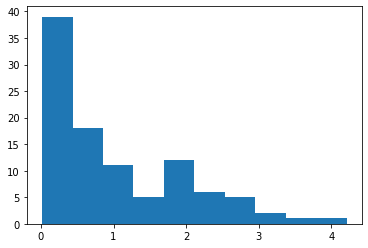

In [392]:
#plotting histogram of the last sample from the loop:
plt.hist(rescaled_sample,label="last_sample")
plt.show()

Above plot of the last sample is definitely skewed to the right, exactly as chi-squared distribution.

#### b) Plot the KDE or a histogram for the sample of means and the sample of variances. Add the density of the normal distribution for comparison purposes. Compare the density estimator with the normal density. What do you expect and why (statistical reasoning!)?

In [393]:
X = stats.norm(1,1)
sample_normal = np.linspace(*X.interval(0.999), num=100)
#creating samples and measuring their mean and variance via loop

In [394]:
res_means = stats.relfreq(sample_means,numbins=25)
x_means = res_means.lowerlimit + np.linspace(0, res_means.binsize*res_means.frequency.size, res_means.frequency.size)
res_vars = stats.relfreq(sample_vars,numbins=25)
x_vars = res_vars.lowerlimit + np.linspace(0, res_vars.binsize*res_vars.frequency.size, res_vars.frequency.size)

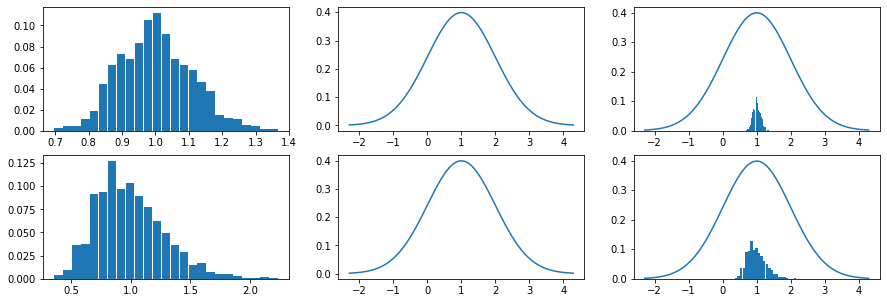

In [395]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

axes[0,0].bar(x_means, res_means.frequency, width=res_means.binsize)
axes[0,1].plot(sample_normal,X.pdf(sample_normal))
axes[0,2].bar(x_means, res_means.frequency, width=res_means.binsize)
axes[0,2].plot(sample_normal,X.pdf(sample_normal))

axes[1,0].bar(x_vars, res_vars.frequency, width=res_vars.binsize)
axes[1,1].plot(sample_normal,X.pdf(sample_normal))
axes[1,2].bar(x_vars, res_vars.frequency, width=res_vars.binsize)
axes[1,2].plot(sample_normal,X.pdf(sample_normal))

plt.show()

- We expected that standard deviation of sample mean distribution is smaller than standard deviation of simple normal density plot, as we see it also on the plot. This fact stems from the formula $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$, where $\sigma$ is population standard deviation. 

- We also expected by the reason of Central limit theorem, that distribution of sample mean $\bar{X}$ , where samples are from  $\chi^2$ distribution, asymptotically converges to normal distribution as n (sample size) goes to infinity. It seems like there is some correspondence, but can also check it, making QQ-plot:

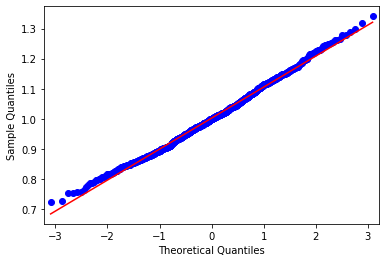

In [396]:
qqplot(np.array(sample_means), line='s')
plt.show()

There are still deviations at both ends of the line, but after increasing sample size it will fit line almost perfectly.

- Exactly as we expected, sample variance after correction n-1 becomes unbiased estimator(expected value of sample variance approximates population parameter), however we should guarantee that by increasing n. Let's check whether it's close to 1:

In [397]:
np.array(sample_vars).mean()

1.004612723756013

Pretty close.

- We also see that sample variance distribution looks like chi-squared distribution, as is expected in general case. 

#### (c) In the lecture we discussed the CLT for the sample mean. Here it seems to apply to the sample variance too. Why?

Asymptotically sample variance distribution will become normal:

$
\sqrt{n}(\hat{σ}^2−σ^2) ⟶^{d} N(0,Var((X_1−\mu)^2))
$

#### d) Let n take values $10^3$ , $10^4$ , $10^5$ and $10^6$ . Check the impact of n on the results. Can the statement of the CLT be confirmed?

In [398]:
np.random.seed(987)
sizes = [1000,10000,100000,1000000]
n_vars = []

X = stats.chi2(df=2)
for size in sizes:
    sample_vars = []
    for i in range(b):
        #generate chi sample
        sample = X.rvs(size)
        #transform sample to get variance and mean of 1
        rescaled_sample = sample / 2
        #append means and vaiances
        sample_vars.append(rescaled_sample.var(ddof=1))
    n_vars.append(sample_vars)

Let's check normality via QQ-plot for every size:

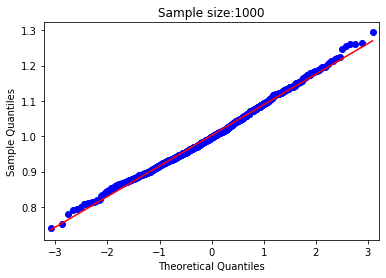

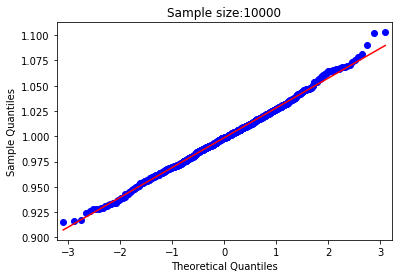

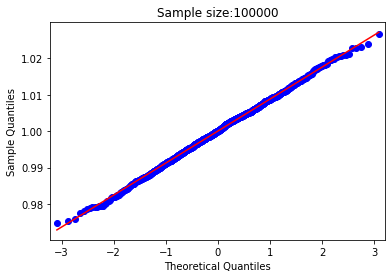

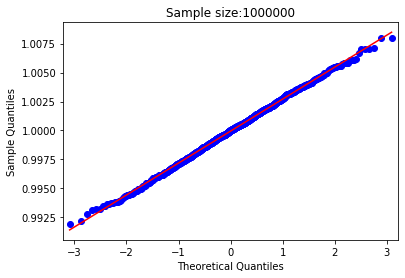

In [399]:
for var,size in zip(n_vars,sizes):
    qqplot(np.array(var), line='s')
    plt.title("Sample size:{}".format(size))
    plt.show()

We can also do Shapiro test, but I don't see it necessary, as it is clear that sample variance distribution for large samples approximates normal distribution, which directly stems from Central Limit Theorem.

### (4)

#### (a) Simulate a sample of length $n = 100$ from a normal distribution with mean $μ_0 = 500$ and variance $σ^2 = 50$. The objective is to test the null hypothesis $H_0 : μ = 500$. Assume that $σ^2$ has to be estimated. Compute the test statistics using the formulas in the lecture; determine the rejection area for $α = 0.04$ and decide if $H_0$ can be rejected.

In [400]:
#sample simulation
n=100
mean=500
var=50
sample = stats.norm.rvs(loc=mean, scale=np.sqrt(var), size=n)

# assuming not known sigma:
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)

#Null hypothesis and confidence level
null_hypothesis = 500
alpha = 0.04

#computing test statistic
test_statistic = (np.sqrt(n)*(sample_mean - null_hypothesis))/sample_std
print("Test statistic is",test_statistic)
conf_left_side = -stats.t.ppf(1 - alpha/2, df=n-1)
conf_right_side = stats.t.ppf(1 - alpha/2, df=n-1)
print('Rejection area is (-inf, {}) U ({}, +inf) '.format(conf_left_side,  conf_right_side))
                                                                                              

Test statistic is -0.07753197723976837
Rejection area is (-inf, -2.081161540890138) U (2.081161540890138, +inf) 


Test statistic is inside rejection area, so we can't reject null hypothesis.

#### (b) Determine the p-values using the formulas from the lecture and compare/check the results using a build-in function for this test in R or Python. Give a verbal interpretation of the obtained p-value.

Custom p-value:

In [401]:
def custom_p_value(test_statistic):
    if test_statistic > 0:
        p_value = (1 - stats.t.cdf(test_statistic, df=n-1))*2
    else:
        p_value = stats.t.cdf(test_statistic, df=n-1)*2
    return p_value

In [402]:
cust_p_value = custom_p_value(test_statistic)

P-value from built-in function:

In [403]:
p_value = stats.ttest_1samp(sample, 500)[1]

In [404]:
print("P-value from my custom function is",cust_p_value)
print("P-value from built-in function is",p_value)

P-value from my custom function is 0.9383568360419544
P-value from built-in function is 0.9383568360419544


As we see, values are practically the same.

In [405]:
sample_mean

499.94159029641844

In [406]:
p_value < alpha

False

We see that alpha is less then p-value. It means that we cannot reject a null hypothesis, because probability of obtaining result at least as extreme as the result of the test in not less than our significance level, assuming that the null hypothesis is correct. It's not surprising, given that sample mean is close to the true value.

#### (c) Simulate $M = 1000$ samples of size $n = 100$ and with $µ_0 = 500$ and variance $\sigma^2 = 50$. For each sample $i$ run the test (using a standard function) and set $p_i = 0$ if $H_0$ is not rejected and $p_i = 1$ if rejected. Compute $\hat \alpha = \frac1M\sum_{i=1}^M p_i$ . $\hat \alpha$ is the empirical conﬁdence level (empirical size) of the test. Compare $\hat \alpha$ to $\alpha$? Do you expect the diﬀerence to be large or small and why? Relate it to the assumptions of the test.

In [407]:
np.random.seed(123)

M = 1000
n = 100
mean = 500
std = np.sqrt(50)

#arbitrary alpha 
alpha = 0.01

samples = stats.norm.rvs(loc=mean, scale=std,size=n*M).reshape((M,n))
result = []
for sample in samples:
    pvalue = sm.stats.ztest(sample, value=mean)[1]
    rejection = pvalue < alpha
    result.append(int(rejection))
    
emp_conf_level = np.mean(result)

print('Empirical conﬁdence level is',emp_conf_level)
print('')
print('Significance level is',alpha)

Empirical conﬁdence level is 0.01

Significance level is 0.01


In [408]:
print("Number of rejections:",len([i for i in result if i==1]))

Number of rejections: 10


I expected that difference would be would be small. Type 1 error shall be with probability $\alpha$, given that we've been told that distibution is normal. We had 10 rejections and that's exact amount we should get, given that $M / \alpha = 10$.

#### (d) Assume now that one of the assumptions is not satisﬁed. For example, the data is in fact not normal. Repeat the above analysis, but simulate the data from the t-distribution with 3 degrees of freedom.Compute $x_i = 500 + \sqrt{ 50 }*z_i / \sqrt{3}$. (Note: This will guarantee the same expectation and the same variance as the above normal distribution.) Recompute a new $\hat{α}$. What do you expect? Relate your answer to the type one error and the underlying assumptions. 

In [413]:
#arbitrary alpha 
alpha = 0.01

np.random.seed(123)

M = 1000
n = 100

Z_samples = stats.t.rvs(df=df,size=n*M).reshape((M,n))

X_samples = []
for z in Z_samples:
    x = 500 + np.sqrt(50)*(z/np.sqrt(3))
    X_samples.append(x)

In [414]:
result = []
for x in X_samples:
    pvalue = sm.stats.ztest(x, value=mean)[1]
    rejection = pvalue < alpha
    result.append(int(rejection))
    
emp_conf_level = np.mean(result)

print('Empirical conﬁdence level is',emp_conf_level)
print('')
print('Significance level is',alpha)

Empirical conﬁdence level is 0.008

Significance level is 0.01


Empirical confidence level is also pretty close to significance level (type I error). It was expected as t-distribution is close to normal, however it is still different. We don't have the same assumtions as in normal case, but we can reach a very close estimate, if we increase our sample size. As wast stated in (1)(c), the larger the sample size (n), the closer the confidence intervals from t-distribution mimics confidence intervals of z-distribution.

#### (e) 

#### Simulate $M = 1000$ samples of size 100 from a t-distribution with $df = 2, \dots, 50$ degrees of freedom. For each sample run the Kolmogorov-Smirnov test and count the cases when the $H_0$ of normality is correctly rejected (for each df). How would you use this quantity to estimate the power of the test? Make an appropriate plot with the df on the X-axis.  Discuss the plot and draw conclusions about the reliability of the test.

Power of the test is $1 - \beta$. It equals probability that the test rejects the $H_0$ when $H_1$ is true.

In [411]:
np.random.seed(123)

M = 1000
n = 100
#degrees of freedom
possible_df = np.array([i for i in range(2,51)])
#list of future computed alphas
alphas = []
#looping through degrees of freedom
for df in possible_df:
    #creating result list for each df
    result = []
    #constructing samples for each df
    samples = stats.t.rvs(df=df,size=n*M).reshape(M,n)
    #iterating via samples
    for sample in samples:
        kolg_smirn_stat, pvalue = stats.kstest(sample, 'norm')
        #we can use indicator variable for rejection
        result.append(int(pvalue < kolg_smirn_stat))
    alphas.append(np.mean(result))
                                                  

We can use frequency of rejection $H_0$ as an estimation of a test's power (empirical power of the test).

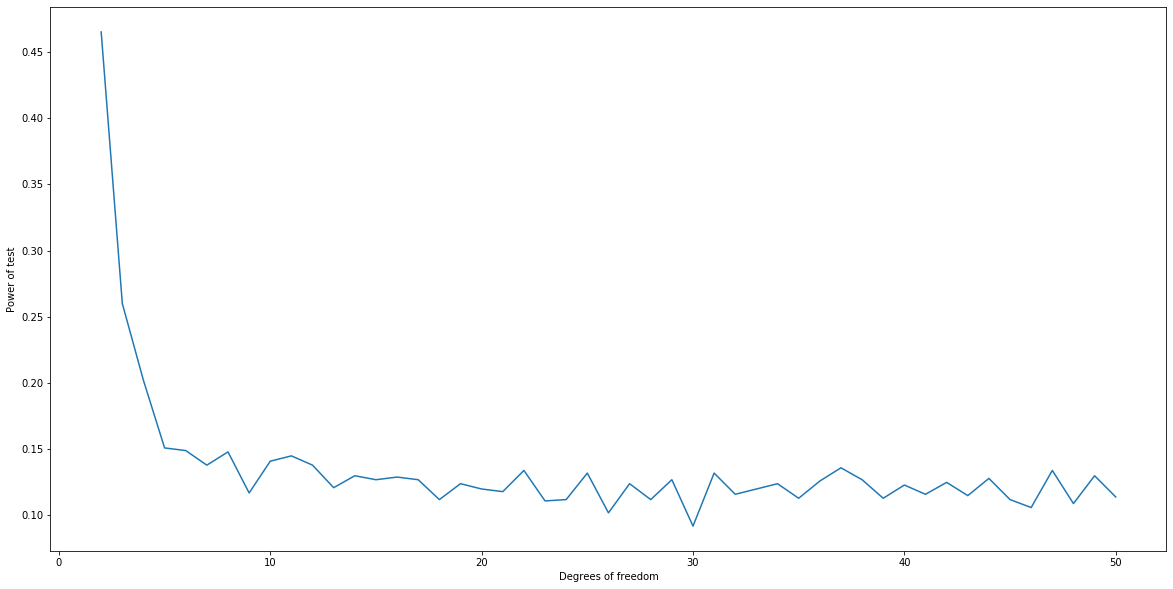

In [412]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(possible_df, alphas)
plt.ylabel('Power of test')
plt.xlabel('Degrees of freedom')
plt.show()

The more df grows the less frequently $H_0$ is rejected. Thus, power of test decreases with increasing df. And this is absolutely understandable, given that the higher df , the closer student distribution is to the normal distribution, as was noted in (3)(d).